# YOUR PROJECT TITLE

For this assignment, I will be using two data sets that are relevant to agriculture and weather in the United States, specifically North Dakota, being one of the biggest wheat producing states in the US. The first data set contains information on yearly corn yield per acre, from around 1900 to 2022. This data is from USDA National Agricultural Statistics Service (NASS). The second data set contains yearly average temperature, precipitation, and the date of the first freeze, from a central weather station in North Dakota, with data ranging from a similar interval as the agricultural data. This data is sourced from the National Oceanic and Atmospheric Administration (NOAA). By combining these data sets, the hope is to investigate the relationship between weather patterns and corn production in the North Dakota over the past century.

Imports and set magics:

In [549]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# data folder
import dataproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

To begin, let's read the first data set on wheat yield and inspect it:

In [550]:
NDyield = pd.read_csv('ND_yield.csv') # Read csv file

NDyield.head(10)


,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,SURVEY,2022,YEAR,NaN,STATE,NORTH DAKOTA,38,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,48.9,NaN
1,SURVEY,2021,YEAR,NaN,STATE,NORTH DAKOTA,38,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,32.2,NaN
2,SURVEY,2020,YEAR,NaN,STATE,NORTH DAKOTA,38,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,47.6,NaN
3,SURVEY,2019,YEAR,NaN,STATE,NORTH DAKOTA,38,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,48.4,NaN
4,SURVEY,2018,YEAR,NaN,STATE,NORTH DAKOTA,38,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,47.6,NaN
5,SURVEY,2017,YEAR,NaN,STATE,NORTH DAKOTA,38,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,37.9,NaN
6,SURVEY,2016,YEAR,NaN,STATE,NORTH DAKOTA,38,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,45.0,NaN
7,SURVEY,2015,YEAR,NaN,STATE,NORTH DAKOTA,38,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,46.7,NaN
8,SURVEY,2015,YEAR - AUG FORECAST,NaN,STATE,NORTH DAKOTA,38,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,46.4,NaN
9,SURVEY,2015,YEAR - JUL FORECAST,NaN,STATE,NORTH DAKOTA,38,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,46.4,NaN


As can be seen, we have a lot of unnecessary information, that should be dropped for simplicity and to make the data set easier to manage. More importantly, the data also contains forecasts, and these are not needed, so should be deleted first: 


In [551]:
I = NDyield.Period.str.contains('FORECAST') # Define array of rows that contain the word FORECAST
NDyield = NDyield.loc[I == False] # Keep all rows without 'FORECAST' in the year variable
NDyield.reset_index(inplace = True, drop = True) # Reset index

Next, let's make the data set narrower by dropping everything but the year and the average yield per acre (Most other variables have the same value in each row anyways, since all the data is from North Dakota)

In [552]:
# Define variables to be dropped
drop_variables_yield = ['Program', 'Period', 'Week Ending','Geo Level','State','State ANSI','Ag District','Ag District Code', 'County', 'County ANSI', 'Zip Code', 'Region', 'watershed_code', 'Watershed','Commodity','Data Item', 'Domain', 'Domain Category', 'CV (%)']
# Drop them
NDyield = NDyield.drop(columns = drop_variables_yield)

NDyield.head(100)

,Year,Value
0,2022,48.9
1,2021,32.2
2,2020,47.6
3,2019,48.4
4,2018,47.6
...,...,...
95,1927,12.9
96,1926,8.6
97,1925,12.3
98,1924,15.3


Now we are left with the information relevant to this project, let's continue by importing the weather data:

In [553]:
NDweather = pd.read_csv('ND_weather.csv') # Read 2nd csv file containing weather data

NDweather.head(5)

,STATION,NAME,DATE,FZF0,PRCP,TAVG
0,USC00326365,"NEW SALEM 5 NW, ND US",1923,30.0,NaN,40.9
1,USC00326365,"NEW SALEM 5 NW, ND US",1924,NaN,NaN,NaN
2,USC00326365,"NEW SALEM 5 NW, ND US",1925,27.0,NaN,43.0
3,USC00326365,"NEW SALEM 5 NW, ND US",1926,30.0,NaN,NaN
4,USC00326365,"NEW SALEM 5 NW, ND US",1927,NaN,NaN,NaN


Again we have some variables that can be dropped, namely 'NAME' and 'STATION', that are the same for each row.

In [554]:
drop_variables_weather = ['STATION', 'NAME'] # Define variables to be dropped
NDweather = NDweather.drop(columns=drop_variables_weather) # Drop them
NDweather.head(10)

,DATE,FZF0,PRCP,TAVG
0,1923,30.0,NaN,40.9
1,1924,NaN,NaN,NaN
2,1925,27.0,NaN,43.0
3,1926,30.0,NaN,NaN
4,1927,NaN,NaN,NaN
5,1928,30.0,NaN,43.2
6,1929,NaN,NaN,NaN
7,1931,28.0,NaN,NaN
8,1932,32.0,NaN,41.4
9,1933,30.0,12.86,42.5


There also seems to be a lot of missing values. To locate these, the .isna function is used:

In [555]:
NDweather[NDweather.isna().any(axis=1)] # Returns rows (axis=1) with NaN values from the entire dataframe with .any


,DATE,FZF0,PRCP,TAVG
0,1923,30.0,NaN,40.9
1,1924,NaN,NaN,NaN
2,1925,27.0,NaN,43.0
3,1926,30.0,NaN,NaN
4,1927,NaN,NaN,NaN
5,1928,30.0,NaN,43.2
6,1929,NaN,NaN,NaN
7,1931,28.0,NaN,NaN
8,1932,32.0,NaN,41.4
13,1937,32.0,NaN,38.9


To drop the rows with NaN, iloc can be used to slice the dataframe. At the same time the ordering of the weather data is also opposite from the yield data, and this too can be accounted for using reset_index in connection with .iloc:

In [556]:
NDweather = NDweather.iloc[98:32:-1].reset_index(drop=True) # Slices from the second last element (2022) to the 32nd (1957) and resets the index
NDweather.head(100)

,DATE,FZF0,PRCP,TAVG
0,2022,16.0,21.21,40.0
1,2021,30.0,14.49,44.3
2,2020,27.0,10.66,42.7
3,2019,31.0,27.69,38.0
4,2018,29.0,17.93,39.9
...,...,...,...,...
61,1961,30.0,13.44,42.3
62,1960,30.0,14.92,41.8
63,1959,22.0,10.95,41.0
64,1958,32.0,10.57,42.4


Now let's see if there are any NaN values left:

In [557]:
NDweather[NDweather.isna().any(axis=1)] # Looks for NaN values

,DATE,FZF0,PRCP,TAVG


Next, the yield data should also be sliced to only include 1957-2022:

In [558]:
NDyield = NDyield.iloc[0:66:] # Slice yield data
NDyield.head(100)

,Year,Value
0,2022,48.9
1,2021,32.2
2,2020,47.6
3,2019,48.4
4,2018,47.6
...,...,...
61,1961,12.1
62,1960,19.8
63,1959,15.0
64,1958,23.1


Finally the weather variables can be renamed for clarity:

In [559]:
# Rename weather variables
NDweather.rename(columns = {'DATE':'Year'}, inplace=True)
NDweather.rename(columns = {'FZF0':'First freeze day'}, inplace=True)
NDweather.rename(columns = {'PRCP':'Precipitation'}, inplace=True)
NDweather.rename(columns = {'TAVG':'Average Temperature'}, inplace=True)
NDweather.head()

,Year,First freeze day,Precipitation,Average Temperature
0,2022,16.0,21.21,40.0
1,2021,30.0,14.49,44.3
2,2020,27.0,10.66,42.7
3,2019,31.0,27.69,38.0
4,2018,29.0,17.93,39.9


## Explore each data set

To begin exploring the data set, pandas .describe function is utilized to give summary statistics of the time series:

In [560]:
NDyield.describe() # Summary statistics

,Year,Value
count,66.000000,66.000000
mean,1989.500000,31.150000
std,19.196354,8.855424
min,1957.000000,12.100000
25%,1973.250000,25.075000
50%,1989.500000,30.300000
75%,2005.750000,35.750000
max,2022.000000,48.900000


Thus the average yield of wheat in North Dakota is 31.15 bushels per acre. A bushel is about 67.25 kgs, and the conversion can easily be implemented while changing the name to reflect it:

In [561]:
NDyield['Value'] = NDyield['Value']*67.25 # Bushels to kg conversion
NDyield.rename(columns= {'Value':'Kg/acre'}, inplace=True) # Rename variable
NDyield.describe()

,Year,Kg/acre
count,66.000000,66.00000
mean,1989.500000,2094.83750
std,19.196354,595.52728
min,1957.000000,813.72500
25%,1973.250000,1686.29375
50%,1989.500000,2037.67500
75%,2005.750000,2404.18750
max,2022.000000,3288.52500


Next, the weather data can be inspected in a similar fashion:

In [562]:
NDweather.describe()

,Year,First freeze day,Precipitation,Average Temperature
count,66.000000,66.000000,66.000000,66.000000
mean,1989.500000,28.863636,17.549242,41.645455
std,19.196354,3.219586,4.383108,2.069350
min,1957.000000,16.000000,10.570000,37.400000
25%,1973.250000,27.250000,14.130000,39.900000
50%,1989.500000,30.000000,17.475000,41.700000
75%,2005.750000,31.000000,20.242500,43.100000
max,2022.000000,32.000000,28.240000,46.800000


It is noticable that the average temperature in such a northern US state should be above 40 degrees. This is obviously because it is measured in Fahrenheit rather than Celcius. Similarly precipitation is meassured in inches rather than mm. To account for this the following conversions are implemented:

In [563]:
NDweather['Average Temperature'] = (NDweather['Average Temperature']-32)*5/9 # Fahrenheit to celcius conversion
NDweather['Precipitation'] = NDweather['Precipitation']*25.4 # Inches to mm conversion

NDweather.describe()

,Year,First freeze day,Precipitation,Average Temperature
count,66.000000,66.000000,66.000000,66.000000
mean,1989.500000,28.863636,445.750758,5.358586
std,19.196354,3.219586,111.330932,1.149639
min,1957.000000,16.000000,268.478000,3.000000
25%,1973.250000,27.250000,358.902000,4.388889
50%,1989.500000,30.000000,443.865000,5.388889
75%,2005.750000,31.000000,514.159500,6.166667
max,2022.000000,32.000000,717.296000,8.222222


On average it rains 445.75 mm a year in North Dakota, and the annual average temperature is around 5 degrees C, while the first day with 0 degrees on average comes January 29th. To see how yield and weather evolves over time, it might be of interest to look at a plot. 

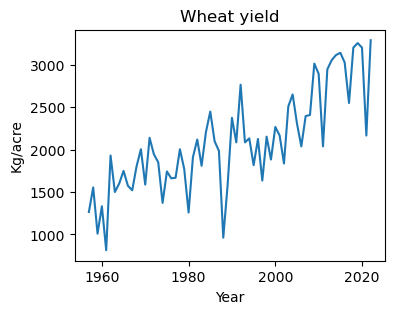

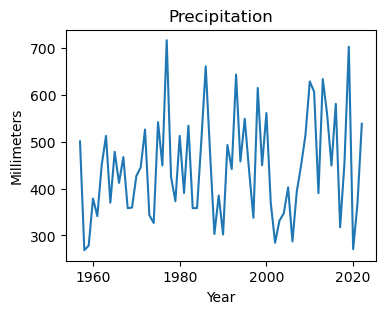

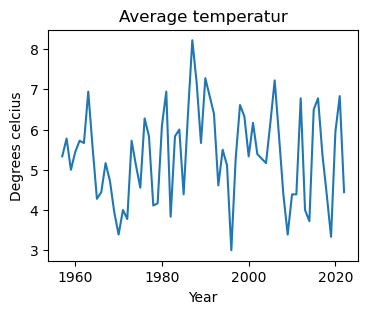

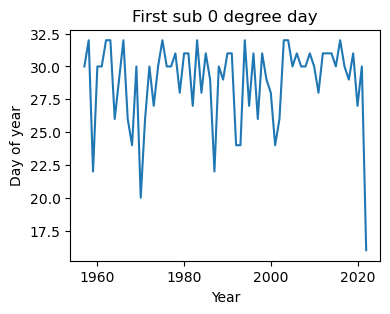

In [564]:
# Makes a plot of each variable with Year on the x axis

Yield_figure = plt.figure(figsize=(4, 3))
plt.plot(NDyield['Year'], NDyield['Kg/acre'])
plt.title('Wheat yield')
plt.xlabel('Year')
plt.ylabel('Kg/acre')
plt.show()

Precipitation_figure = plt.figure(figsize=(4, 3))
plt.plot(NDweather['Year'], NDweather['Precipitation'])
plt.title('Precipitation')
plt.xlabel('Year')
plt.ylabel('Millimeters')
plt.show()

AvgTemp_figure = plt.figure(figsize=(4, 3))
plt.plot(NDweather['Year'], NDweather['Average Temperature'])
plt.title('Average temperatur')
plt.xlabel('Year')
plt.ylabel('Degrees celcius')
plt.show()

First_freeze_figure = plt.figure(figsize=(4, 3))
plt.plot(NDweather['Year'], NDweather['First freeze day'])
plt.title('First sub 0 degree day')
plt.xlabel('Year')
plt.ylabel('Day of year')
plt.show()

From inspection of the plots, there seems to be a trend in the wheat yield time series, with yields rising over time. The other time series all fluctuate more randomly. To explore whether there are any relationships between the time series, I later turn to inspecting the correlation coefficients.

# Merge data sets

Merging the two data sets is in this case rather simple, since it's already been cleaned thoroughly. To join them an inner join is used on the Year variable:

In [565]:
ND_combined = pd.merge(NDweather,NDyield, on= 'Year', how='inner') # Merge
ND_combined.head(66)

,Year,First freeze day,Precipitation,Average Temperature,Kg/acre
0,2022,16.0,538.734,4.444444,3288.525
1,2021,30.0,368.046,6.833333,2165.450
2,2020,27.0,270.764,5.944444,3201.100
3,2019,31.0,703.326,3.333333,3254.900
4,2018,29.0,455.422,4.388889,3201.100
...,...,...,...,...,...
61,1961,30.0,341.376,5.722222,813.725
62,1960,30.0,378.968,5.444444,1331.550
63,1959,22.0,278.130,5.000000,1008.750
64,1958,32.0,268.478,5.777778,1553.475


# Analysis

To begin analyzing the dataset, it might be interesting to look at the correlation coefficients between yield and the other variables. To do this, the pandas .corr function is used:

In [566]:
corr_matrix = ND_combined.corr() # Create a matrix of correlation coefficients between variables
print(corr_matrix)

                         Year  First freeze day  Precipitation  \
Year                 1.000000          0.028253       0.187188   
First freeze day     0.028253          1.000000       0.044865   
Precipitation        0.187188          0.044865       1.000000   
Average Temperature  0.035088          0.100007      -0.263792   
Kg/acre              0.801916          0.032457       0.295309   

                     Average Temperature   Kg/acre  
Year                            0.035088  0.801916  
First freeze day                0.100007  0.032457  
Precipitation                  -0.263792  0.295309  
Average Temperature             1.000000 -0.161478  
Kg/acre                        -0.161478  1.000000  


To make the correlations easier to read, the seaborn package offers a great heatmap solution:

<AxesSubplot:>

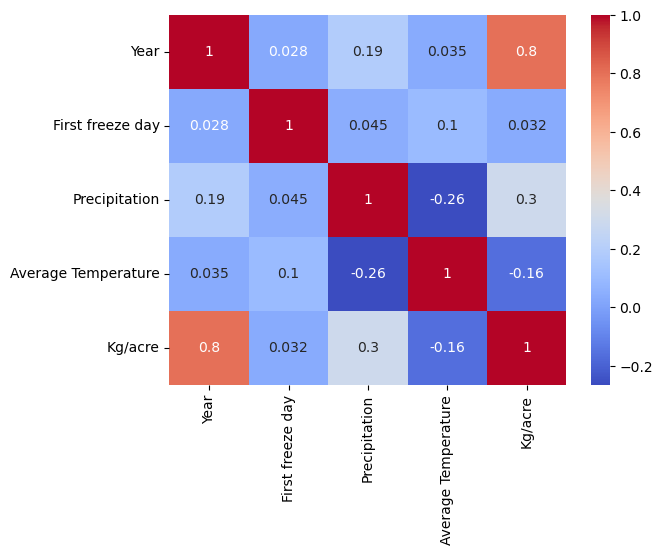

In [567]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') # Creates heatmap

Not surprisingly Year has the highest correlation with the wheat yield, indicating some sort of upward trend in the time series for wheat yield. This can most likely be explained by technological advancements in the aggricultural sector. First freeze day seems to have little correlation with yield, while both precipitation and average temperature does seem to influence it. However, the correlation with precipitation is almost twice as big as temperature, indicating that rain fall is more important than heat for wheat farming. Further, the correlation coefficient for temperature is negative, indicating that a higher temperature yields less wheat per acre. However, seing that temperature and precipitation is also correlated to a similar extent, it might be that there is some confounding going on between these variables. Last it is worth mentioning that the correlation between year and precipitation is also much larger than that between year and average temperature. This might suggest that climate change affects the amount of snow and rain more than the average yearly temperature, in the case of North Dakota.

# Conclusion

This project, while focusing mostly on loading, cleaning and merging data, has shown some interesting things about the relationship between weather and aggricultural output in North Dakota. First, there is a clear upward trend in productivity, with wheat yield per acre almost doubling over the period considered. This cannot be accounted for purely by weather phenomena, however, there does seem to be some correlation between especially precipitation and wheat yield.